# Comparing the ML models

### Unzip cropped dataset

## Imports

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense, Softmax
import matplotlib.pyplot as plt
import numpy as np

## Loading the dataset as grayscale images

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (1, )
VALIDATION_SPLIT = 0.2
train_set = tf.keras.utils.image_dataset_from_directory("./cropped",
    color_mode="grayscale", seed=42, label_mode="categorical",
    batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, validation_split=VALIDATION_SPLIT,
    subset="training", shuffle=True
)
valid_set = tf.keras.utils.image_dataset_from_directory("./cropped",
    color_mode="grayscale", seed=42, label_mode="categorical",
    batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, validation_split=VALIDATION_SPLIT,
    subset="validation", shuffle=True
)

Found 81 files belonging to 3 classes.
Using 65 files for training.
Found 81 files belonging to 3 classes.
Using 16 files for validation.


In [ ]:
class_names = train_set.class_names
class_names

['adenomyosis', 'fibroid', 'normal']

## Visualizing some samples

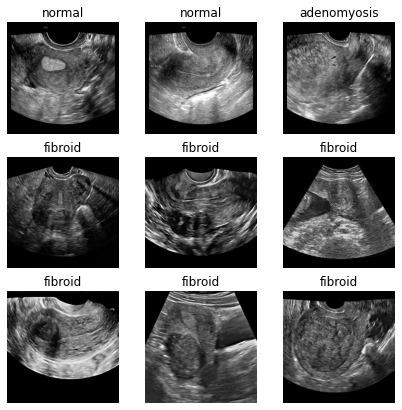

In [ ]:
plt.figure(figsize=(7, 7))
for images, labels in train_set.take(1):
    for i in range(9):
        label_idx = np.where(labels[i].numpy() == 1)[0][0]
        ax = plt.subplot(3, 3, i + 1)
        data = images[i].numpy().astype("uint8")
        plt.imshow(np.squeeze(data), cmap=plt.get_cmap('gray'))
        plt.title(class_names[label_idx])
        plt.axis("off")

In [ ]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1)])

## Using Mobilenet V2

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMAGE_SHAPE, include_top=False, weights=None)


In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257408   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dropout_8 (Dropout)         (None, 62720)             0         
                                                                 
 dense_26 (Dense)            (None, 256)               16056576  
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                     

In [ ]:
history = model.fit(train_set, validation_data=valid_set, epochs=50, batch_size=BATCH_SIZE)

Epoch 1/50
3/3 [==============================] - 6s 487ms/step - loss: 18.0371 - accuracy: 0.5385 - val_loss: 1.1799 - val_accuracy: 0.3750
Epoch 2/50
3/3 [==============================] - 1s 133ms/step - loss: 3.3537 - accuracy: 0.7077 - val_loss: 1.1632 - val_accuracy: 0.1875
Epoch 3/50
3/3 [==============================] - 1s 137ms/step - loss: 18.5094 - accuracy: 0.6615 - val_loss: 1.2840 - val_accuracy: 0.3750
Epoch 4/50
3/3 [==============================] - 1s 138ms/step - loss: 3.9142 - accuracy: 0.6923 - val_loss: 1.4486 - val_accuracy: 0.3750
Epoch 5/50
3/3 [==============================] - 1s 132ms/step - loss: 31.5298 - accuracy: 0.5077 - val_loss: 1.2279 - val_accuracy: 0.3750
Epoch 6/50
3/3 [==============================] - 1s 136ms/step - loss: 3.1114 - accuracy: 0.6462 - val_loss: 1.1650 - val_accuracy: 0.1875
Epoch 7/50
3/3 [==============================] - 1s 133ms/step - loss: 3.4068 - accuracy: 0.7385 - val_loss: 1.1724 - val_accuracy: 0.3750
Epoch 8/50
3/3 [=

## Loading dataset as RGB images

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (3, )
VALIDATION_SPLIT = 0.2
train_set = tf.keras.utils.image_dataset_from_directory("./cropped",
    seed=42, label_mode="categorical",
    batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, validation_split=VALIDATION_SPLIT,
    subset="training", shuffle=True
)
valid_set = tf.keras.utils.image_dataset_from_directory("./cropped",
    seed=42, label_mode="categorical",
    batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, validation_split=VALIDATION_SPLIT,
    subset="validation", shuffle=True
)

Found 81 files belonging to 3 classes.
Using 65 files for training.
Found 81 files belonging to 3 classes.
Using 16 files for validation.


## Using VGG16 model 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=IMAGE_SHAPE)
base_model.trainable = False 

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

history = model.fit(train_set, validation_data=valid_set, epochs=50, batch_size=BATCH_SIZE)

Epoch 1/50
3/3 [==============================] - 2s 245ms/step - loss: 27.5075 - accuracy: 0.3692 - val_loss: 100.5348 - val_accuracy: 0.4375
Epoch 2/50
3/3 [==============================] - 1s 143ms/step - loss: 65.0191 - accuracy: 0.4308 - val_loss: 4.8777 - val_accuracy: 0.4375
Epoch 3/50
3/3 [==============================] - 1s 144ms/step - loss: 18.5202 - accuracy: 0.4308 - val_loss: 10.9877 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 148ms/step - loss: 10.6650 - accuracy: 0.5538 - val_loss: 7.2111 - val_accuracy: 0.4375
Epoch 5/50
3/3 [==============================] - 1s 144ms/step - loss: 8.5100 - accuracy: 0.5692 - val_loss: 2.1082 - val_accuracy: 0.8125
Epoch 6/50
3/3 [==============================] - 1s 144ms/step - loss: 9.2215 - accuracy: 0.6154 - val_loss: 5.2441 - val_accuracy: 0.6250
Epoch 7/50
3/3 [==============================] - 1s 144ms/step - loss: 8.4370 - accuracy: 0.7231 - val_loss: 4.7699 - val_accuracy: 0.5625
Epoch 8/50
3/

### Visualizing model accuracy

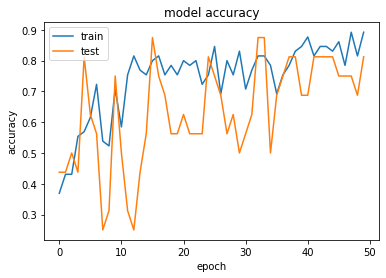

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualizing model loss

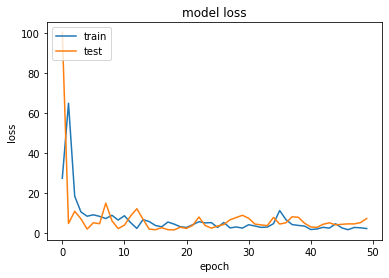

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()